In [1]:
import requests
import os
import json

# API base URL and token
BASE_URL = "https://renforce.esapro.it/api"
API_TOKEN = "2c23937283ed6125f52c4ba7399c7baebdfb3f051ac9272550847066011d7d5a83807bb0c3c807e2450fcb7fd4843d126badcf4c3f0ee52ca548b43db77e100e48becf05cb5e93529564055dd8a85d9beb089420a91eec2a022fbf8f984d9138a26afc5296e60aed14024c60ddcb95dff130b3f9fb7af13598a48dbc62348389"

# Plant code
PLANT_CODE = "P1130"
RESOLUTION=1

# Headers for authentication
HEADERS = {
    "X-API-Token": API_TOKEN
}

# Function to retrieve plant configurations
def get_plant_configurations(plant_code):
    """
    Retrieves the plant configurations from the API.

    Args:
        plant_code (str): The plant code.

    Returns:
        dict: The API response as a dictionary.
    """
    url = f"{BASE_URL}/{plant_code}/config"
    response = requests.get(url, headers=HEADERS)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to retrieve configurations: {response.status_code}, {response.text}")

# Main execution
try:
    # Retrieve configurations
    configurations = get_plant_configurations(PLANT_CODE)

    # Print the response on the screen with better formatting
    print("\nAPI Response:")
    print("=" * 40)
    for config in configurations:
        for key, value in config.items():
            print(f"{key}: {value}")
        print("-" * 40)

    # Save the response to a file
    base_dir = "Data"
    os.makedirs(base_dir, exist_ok=True)
    file_path = os.path.join(base_dir, f"{PLANT_CODE}_configurations.json")
    with open(file_path, "w", encoding="utf-8") as file:
        json.dump(configurations, file, indent=4)
    print(f"\nConfigurations saved to: {file_path}")

    # Create a constant variable for the version
    VERSION = configurations[-1].get("v", "N/A")  # Assuming the version is in the first configuration
    print(f"\nVERSION constant created: {VERSION}")

except Exception as e:
    print("Error:", e)


API Response:
v: 1
t: 1980-01-01 00:00:00
----------------------------------------

Configurations saved to: Data/P1130_configurations.json

VERSION constant created: 1


In [6]:
import requests
import os
import csv
import json

def get_blocks(plant_code, config_version, block_types=None):
    """
    Retrieves a list of blocks (devices) from a specific plant configuration.

    Args:
        plant_code (str): The plant code (e.g., "P1234").
        config_version (int): Configuration identifier.
        block_types (str or list, optional): Type(s) of blocks to filter (e.g., "INVERTER" or ["COUNTER", "INVERTER"]).

    Returns:
        list: Array of block objects representing devices in the plant.
    """
    url = f"{BASE_URL}/{plant_code}/blocks/{config_version}"
    params = {}
    if block_types:
        params["type"] = block_types if isinstance(block_types, str) else ",".join(block_types)
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print("Response Status Code:", response.status_code)
            print("Response Text:", response.text)
            raise Exception(f"Failed to retrieve blocks: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"An error occurred while making the request: {e}")

def save_blocks_to_csv(plant_code, blocks):
    """
    Saves the blocks to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        blocks (list): List of block objects.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_blocks.csv")

    # Write blocks to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["ID", "Name", "Type", "Description", "OID", "Properties", "Sensors", "Visible", "Enabled"])
        # Write the data
        for block in blocks:
            writer.writerow([
                block.get("id", "N/A"),
                block.get("name", "N/A"),
                block.get("type", "N/A"),
                block.get("desc", "N/A"),
                block.get("oid", "N/A"),
                block.get("props", "N/A"),
                block.get("sens", "N/A"),
                block.get("visible", "N/A"),
                block.get("enabled", "N/A")
            ])

    print(f"Blocks saved to: {csv_file_path}")

def print_blocks(blocks):
    """
    Prints the blocks nicely on the screen.

    Args:
        blocks (list): List of block objects.
    """
    print("\nBlocks List:")
    for block in blocks:
        print(f"ID: {block.get('id', 'N/A')}")
        print(f"Name: {block.get('name', 'N/A')}")
        print(f"Type: {block.get('type', 'N/A')}")
        print(f"Description: {block.get('desc', 'N/A')}")
        print(f"OID: {block.get('oid', 'N/A')}")
        print(f"Properties: {block.get('props', 'N/A')}")
        print(f"Sensors: {block.get('sens', 'N/A')}")
        print(f"Visible: {block.get('visible', 'N/A')}")
        print(f"Enabled: {block.get('enabled', 'N/A')}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    # Retrieve blocks
    blocks = get_blocks(PLANT_CODE, VERSION)

    # Print blocks nicely
    print_blocks(blocks)

    # Save blocks to CSV
    save_blocks_to_csv(PLANT_CODE, blocks)

except Exception as e:
    print("Error:", e)


Blocks List:
ID: 1
Name: P1130
Type: PLANT
Description: P1130 Collection
OID: 1
Properties: {'alarm_check_timerange': '10:00 - 14:00', 'alarm_irradiance_threshold': '100', 'avoid_night_oos': '0', 'capacity': '4103.2', 'contractual_irr_link': '', 'delivery_period': '30', 'energy_alerts': '0', 'field_alarm_ttl': '10', 'field_data_ttl': '10', 'irr_link.0': '171', 'sunrise_o': '0', 'sunset_o': '0', 'sys_loss': '0.05', 'temp_link.0': '173', 'up_inverter_thld': '0.9', 'up_irr_thld': '600', 'up_irrsd_thld': '0.05', 'up_jbox_thld': '0.9', 'user_irr_link': '', 'user_temp_link': ''}
Sensors: ['J44', 'J30', 'J101', 'J7', 'J34', 'J33', 'J31', 'J1', 'J104', 'J4', 'J102']
Visible: True
Enabled: True
----------------------------------------
ID: 17
Name: Cabina 01
Type: AGGREGATE
Description: 
OID: 1.1
Properties: {'aggr_stop': '1', 'alarm_irradiance_filter': '0', 'capacity': '1370.8', 'context': '', 'irr_link.0': '171', 'minor_aggr': '0', 'temp_link.0': '173', 'user_irr_link': '', 'user_temp_link': 

In [2]:
import requests
import os
import csv


def get_sensors(plant_code, config_version, sensor_types=None):
    """
    Retrieves a list of sensors from a specific plant configuration.

    Args:
        plant_code (str): The plant code (e.g., "P1234").
        config_version (int): Configuration identifier.
        sensor_types (str or list, optional): Type(s) of sensors to filter (e.g., "AC_ACTIVE_ENERGY" or ["AC_ACTIVE_ENERGY", "MODULE_SOLAR_IRRADIANCE"]).

    Returns:
        list: Array of sensor objects.
    """
    url = f"{BASE_URL}/{plant_code}/sensors/{config_version}"
    params = {}
    if sensor_types:
        params["type"] = sensor_types if isinstance(sensor_types, str) else ",".join(sensor_types)
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print("Response Status Code:", response.status_code)
            print("Response Text:", response.text)
            raise Exception(f"Failed to retrieve sensors: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"An error occurred while making the request: {e}")

def save_sensors_to_csv(plant_code, sensors):
    """
    Saves the sensors to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        sensors (list): List of sensor objects.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_sensors.csv")

    # Write sensors to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["ID", "Name", "Type", "Description", "OID", "Properties", "Source", "Visible", "Enabled"])
        # Write the data
        for sensor in sensors:
            writer.writerow([
                sensor.get("id", "N/A"),
                sensor.get("name", "N/A"),
                sensor.get("type", "N/A"),
                sensor.get("desc", "N/A"),
                sensor.get("oid", "N/A"),
                sensor.get("props", "N/A"),
                sensor.get("source", "N/A"),
                sensor.get("visible", "N/A"),
                sensor.get("enabled", "N/A")
            ])

    print(f"Sensors saved to: {csv_file_path}")

def print_sensors(sensors):
    """
    Prints the sensors nicely on the screen.

    Args:
        sensors (list): List of sensor objects.
    """
    print("\nSensors List:")
    for sensor in sensors:
        print(f"ID: {sensor.get('id', 'N/A')}")
        print(f"Name: {sensor.get('name', 'N/A')}")
        print(f"Type: {sensor.get('type', 'N/A')}")
        print(f"Description: {sensor.get('desc', 'N/A')}")
        print(f"OID: {sensor.get('oid', 'N/A')}")
        print(f"Properties: {sensor.get('props', 'N/A')}")
        print(f"Source: {sensor.get('source', 'N/A')}")
        print(f"Visible: {sensor.get('visible', 'N/A')}")
        print(f"Enabled: {sensor.get('enabled', 'N/A')}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    plant_code = PLANT_CODE  # Plant code
    config_version = VERSION       # Configuration version
    sensor_types = None      # Retrieve all sensor types

    # Retrieve sensors
    sensors = get_sensors(plant_code, config_version, sensor_types)
    print(len(sensors), "sensors found")
    # Print sensors nicely
    print_sensors(sensors)

    # Save sensors to CSV
    save_sensors_to_csv(plant_code, sensors)
except Exception as e:
    print("Error:", e)

3572 sensors found

Sensors List:
ID: 1
Name: Voltage L1
Type: VOLTAGE
Description: 
OID: 1.1.14:1
Properties: {'alarm_c': '5', 'alarm_debounce': '60', 'alarm_function': '', 'alarm_max_threshold': '0', 'alarm_min_threshold': '0', 'alarm_tdc': '60', 'alarm_tdo': '60', 'alarm_type': '', 'cast': 'U32', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'register': '3c552', 'sampling_period': '300'}
Source: sundra
Visible: True
Enabled: True
----------------------------------------
ID: 10
Name: Temperature
Type: TEMPERATURE
Description: 
OID: 1.1.1.1:10
Properties: {'alarm_c': '3', 'alarm_debounce': '300', 'alarm_function': 'LIMITALARM', 'alarm_max_threshold': '70', 'alarm_min_threshold': '-10', 'alarm_tdc': '300', 'alarm_tdo': '300', 'alarm_type': '52', 'c_high_pass': '', 'c_low_pass': '', 'cast': 'U16', 'copy_to': '', 'data_age_lmt': '0', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'mask': '', 'mask_value': '1', 'register': '31064', 'sampling_period': '

# Finds how long the data timeline goes for the energy production

In [8]:
import pandas as pd


# Path to the sensors file
SENSORS_FILE = f"Data/{PLANT_CODE}/{PLANT_CODE}_sensors.csv"

# Step 1: Load the sensors file
try:
    sensors_metadata = pd.read_csv(SENSORS_FILE)
except FileNotFoundError:
    print(f"File not found: {SENSORS_FILE}")
    exit()  # Ensure the program exits here to avoid further execution

# Step 2: Find the sensor with the name "Energia Prodotta" or "Energy AC DELTA"
if "Name" not in sensors_metadata.columns:
    print("The 'Name' column is missing in the sensors metadata.")
    exit()

sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energia Prodotta", case=False, na=False)]
if sensor_row.empty:
    sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energy AC DELTA", case=False, na=False)]
    if sensor_row.empty:
        print("Sensor with the name 'Energia Prodotta' or 'Energy AC DELTA' not found.")
        exit()

sensor_id = sensor_row.iloc[0]["ID"]
print(f"Sensor ID for the found sensor: {sensor_id}")
import pandas as pd
from datetime import datetime, timedelta
import requests
import time

# Path to the sensors file
SENSORS_FILE = f"Data/{PLANT_CODE}/{PLANT_CODE}_sensors.csv"

# Step 1: Load the sensors file
try:
    sensors_metadata = pd.read_csv(SENSORS_FILE)
except FileNotFoundError:
    print(f"File not found: {SENSORS_FILE}")
    exit()

# Step 2: Find the sensor with the name "Energia Prodotta" or "Energy AC DELTA"
if "Name" not in sensors_metadata.columns:
    print("The 'Name' column is missing in the sensors metadata.")
    exit()

sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energia Prodotta", case=False, na=False)]
if sensor_row.empty:
    sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energy AC DELTA", case=False, na=False)]
    if sensor_row.empty:
        print("Sensor with the name 'Energia Prodotta' or 'Energy AC DELTA' not found.")
        exit()

sensor_id = sensor_row.iloc[0]["ID"]
print(f"Sensor ID for the found sensor: {sensor_id}")

# Step 3: Retrieve data for the sensor
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
end_date = datetime.now().replace(minute=0, second=0, microsecond=0)  # Round down to the nearest full hour
max_interval = timedelta(days=92)  # Maximum allowed interval (92 days)
no_data_threshold = timedelta(days=365)  # Stop if no data is returned for more than 1 year

current_end = end_date
last_reading = None
no_data_duration = timedelta(0)

while no_data_duration < no_data_threshold:
    current_start = current_end - max_interval
    payload = {
        "from": current_start.strftime("%Y-%m-%d %H:%M:%S"),
        "to": current_end.strftime("%Y-%m-%d %H:%M:%S"),
        "sensors": [sensor_id],
        "resolution": RESOLUTION
    }

    # Make the POST request to the API
    response = requests.post(TREND_URL, headers=HEADERS, json=payload)

    if response.status_code == 200:
        try:
            data = response.json()
        except ValueError:
            print("Failed to parse JSON response.")
            break

        # Check if data is returned for the sensor
        if str(sensor_id) in data and data[str(sensor_id)]:
            sensor_data = data[str(sensor_id)]
            sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
            sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime

            # Update the last reading to the minimum timestamp in this range
            last_reading = sensor_df["timestamp"].min()

            print(f"Data retrieved for range {current_start} to {current_end}.")
            no_data_duration = timedelta(0)  # Reset no data duration
            del sensor_df  # Clear memory
        else:
            print(f"No data for sensor {sensor_id} in range {current_start} to {current_end}.")
            no_data_duration += max_interval  # Increment no data duration
    else:
        print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
        print("Response:", response.text)
        break

    # Move to the previous time range
    current_end = current_start - timedelta(seconds=1)
    time.sleep(1)  # Avoid hitting API rate limits

# Step 4: Save the last reading going backward
if last_reading:
    last_day = last_reading.date()
    print(f"The last day of data for the sensor going backward is: {last_day}")
else:
    print("No data found for the sensor.")

Sensor ID for the found sensor: 156
Sensor ID for the found sensor: 156
Data retrieved for range 2025-03-21 14:00:00 to 2025-06-21 14:00:00.
Data retrieved for range 2024-12-19 13:59:59 to 2025-03-21 13:59:59.
Data retrieved for range 2024-09-18 13:59:58 to 2024-12-19 13:59:58.
Data retrieved for range 2024-06-18 13:59:57 to 2024-09-18 13:59:57.
Data retrieved for range 2024-03-18 13:59:56 to 2024-06-18 13:59:56.
Data retrieved for range 2023-12-17 13:59:55 to 2024-03-18 13:59:55.
Data retrieved for range 2023-09-16 13:59:54 to 2023-12-17 13:59:54.
Data retrieved for range 2023-06-16 13:59:53 to 2023-09-16 13:59:53.
Data retrieved for range 2023-03-16 13:59:52 to 2023-06-16 13:59:52.


KeyboardInterrupt: 

The code under retrieves all the sensors, and specifies which sensors actually have data

In [100]:
# import requests
# import pandas as pd
# import time
# import os
# from datetime import datetime, timedelta

# # API endpoint URLs
# TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
# SENSORS_URL = f"{BASE_URL}/{PLANT_CODE}/sensors/{config_version}"

# # Function to save sensors with data (ID and Name) to a CSV file
# def save_sensors_with_data(plant_code, sensors_with_data, sensors_metadata):
#     """
#     Saves the list of sensors with data (ID and Name) to a CSV file in the specified directory structure.

#     Args:
#         plant_code (str): The plant code.
#         sensors_with_data (list): List of sensor IDs with data.
#         sensors_metadata (pd.DataFrame): DataFrame containing sensor metadata.
#     """
#     # Define the directory structure
#     base_dir = "Data"
#     plant_dir = os.path.join(base_dir, plant_code)

#     # Create directories if they don't exist
#     os.makedirs(plant_dir, exist_ok=True)

#     # Define the CSV file path
#     csv_file_path = os.path.join(plant_dir, f"{plant_code}_sensors_with_data.csv")

#     # Filter metadata to include only sensors with data
#     matching_sensors = sensors_metadata[sensors_metadata["id"].isin(sensors_with_data)]  # Use "id" instead of "ID"

#     # Save the matching sensors (ID and Name) to the CSV file
#     matching_sensors[["id", "name"]].to_csv(csv_file_path, index=False)  # Use "id" and "name" columns

#     print(f"Sensors with data saved to: {csv_file_path}")

# # Fetch the list of sensors
# response_sensors = requests.get(SENSORS_URL, headers=HEADERS)

# if response_sensors.status_code == 200:
#     # Parse the JSON response to get the list of sensors
#     sensors_data = response_sensors.json()
#     sensors_metadata = pd.DataFrame(sensors_data)  # Convert sensor metadata to a DataFrame
#     sensor_ids = sensors_metadata["id"].tolist()  # Get all sensor IDs
#     print(f"Total sensor IDs: {len(sensor_ids)}")
    
#     # Use the last_day from the previous code as the start_date
#     try:
#         # Use the last_day from the previous code as the start_date
#         start_date = datetime.combine(last_day, datetime.min.time())  # Convert last_day (date) to datetime
#     except FileNotFoundError:
#         print("No previous last_day found. Using default start date.")
#         start_date = datetime(2025, 4, 15, 0, 0, 0)  # Default start date

#     # Define the end date dynamically as yesterday
#     end_date = datetime.now() - timedelta(days=1)  # Yesterday's date
#     end_date = end_date.replace(hour=23, minute=59, second=59)  # Set to the end of the day

#     # Define maximum time ranges for each resolution
#     resolution_max_intervals = {
#         0: timedelta(days=92),    # 15-minute resolution
#         1: timedelta(days=368),   # Hourly resolution
#         2: timedelta(days=7300),  # Daily resolution
#         3: timedelta(days=7300),  # Monthly resolution
#         4: timedelta(days=7300)   # Yearly resolution
#     }

#     # Get the maximum interval for the selected resolution
#     max_interval = resolution_max_intervals.get(RESOLUTION, timedelta(days=92))  # Default to 92 days if resolution is unknown

#     # Split the time range into chunks of the maximum interval
#     time_ranges = []
#     current_start = start_date
#     while current_start < end_date:
#         current_end = min(current_start + max_interval, end_date)
#         time_ranges.append((current_start, current_end))
#         current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

#     # Split sensor IDs into batches of 25 sensors per batch
#     batch_size = 25
#     sensor_batches = [sensor_ids[i:i + batch_size] for i in range(0, len(sensor_ids), batch_size)]

#     # Initialize an empty DataFrame
#     df = pd.DataFrame()

#     # List to track sensors with data
#     sensors_with_data = []

#     # Loop through each time range and batch of sensors
#     for time_idx, (start_time, end_time) in enumerate(time_ranges):
#         print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
#         for batch_idx, batch in enumerate(sensor_batches):
#             print(f"Processing batch {batch_idx + 1} with sensors: {batch}")
#             payload = {
#                 "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
#                 "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
#                 "sensors": batch,
#                 "resolution": RESOLUTION  # Use the selected resolution
#             }

#             # Make the POST request to the API
#             response = requests.post(TREND_URL, headers=HEADERS, json=payload)

#             if response.status_code == 200:
#                 # Parse the JSON response
#                 data = response.json()

#                 # Track sensors with no data
#                 no_data_sensors = []

#                 # Transform the data into a DataFrame
#                 for sensor_id, sensor_data in data.items():
#                     if not sensor_data:
#                         no_data_sensors.append(sensor_id)  # Log sensors with no data
#                         continue
#                     sensors_with_data.append(sensor_id)  # Add sensor to the list of sensors with data
#                     sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", sensor_id])
#                     sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
#                     if df.empty:
#                         df = sensor_df
#                     else:
#                         df = pd.merge(df, sensor_df, on="timestamp", how="outer")  # Merge on timestamp

#                 # Log sensors with no data for this batch
#                 if no_data_sensors:
#                     print(f"No data returned for sensors in batch {batch_idx + 1}: {', '.join(map(str, no_data_sensors))}")
#                 else:
#                     print(f"All sensors in batch {batch_idx + 1} have data.")
#             else:
#                 print(f"Failed to fetch trend data for batch {batch_idx + 1}. HTTP Status Code: {response.status_code}")
#                 print("Response:", response.text)

#             # Respect the API rate limit (no more than 5 calls per minute)
#             time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

#     # Remove duplicates from the list of sensors with data
#     sensors_with_data = list(set(sensors_with_data))
#     # Display the DataFrame
#     print("DataFrame:")
#     print(df.head())
    
#     # Display the list of sensors with data
#     print("\nSensors with data:")
#     print(sensors_with_data)
#     print(f"Total sensors with data: {len(sensors_with_data)}")
    
#     # Save the list of sensors with data (ID and Name) to a CSV file
#     save_sensors_with_data(PLANT_CODE, sensors_with_data, sensors_metadata)

#     # Calculate and display the number of missing values
#     if not df.empty:
#         missing_values = df.isna().sum().sum()
#         print(f"Total missing values in the DataFrame: {missing_values}")

# else:
#     print(f"Failed to fetch sensors. HTTP Status Code: {response_sensors.status_code}")
#     print("Response:", response_sensors.text)

In [291]:
import requests
import pandas as pd
import time
import os
from datetime import datetime, timedelta

# API endpoint URLs
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
SENSORS_URL = f"{BASE_URL}/{PLANT_CODE}/sensors/{config_version}"

# Define the specific sensors to process
sensor_ids = ["timestamp", "D.171.ISIRR", "172", "D.156.DELTA"]

# Define the file path
file_path = f"data_{PLANT_CODE}_{RESOLUTION}.csv"

# Check if the file exists and has content
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    print(f"File '{file_path}' exists and is not empty. Loading data into df.")
    df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col="timestamp")
else:
    print(f"File '{file_path}' does not exist or is empty. Fetching data from the API.")

    # Use the last_day as the start_date
    try:
        start_date = datetime.combine(last_day, datetime.min.time())  # Convert last_day (date) to datetime
    except NameError:
        print("No previous last_day found. Using default start date.")
        start_date = datetime(2022, 3, 18, 0, 0, 0)  # Default start date

    # Define the end date as the day before today
    end_date = datetime.now() - timedelta(days=1)  # Day before today
    end_date = end_date.replace(hour=23, minute=59, second=59)  # Set to the end of the day

    max_interval = timedelta(days=92)  # Maximum interval for resolution 0

    # Split the time range into chunks of the maximum interval
    time_ranges = []
    current_start = start_date
    while current_start < end_date:
        current_end = min(current_start + max_interval, end_date)
        time_ranges.append((current_start, current_end))
        current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

    # Initialize a list to store all sensor data
    all_data = []

    # Loop through each time range
    for time_idx, (start_time, end_time) in enumerate(time_ranges):
        print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
        payload = {
            "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
            "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
            "sensors": sensor_ids,
            "resolution": RESOLUTION  # Use the selected resolution
        }

        # Make the POST request to the API
        response = requests.post(TREND_URL, headers=HEADERS, json=payload)

        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Transform the data into a long-format DataFrame
            for sensor_id, sensor_data in data.items():
                if not sensor_data:
                    print(f"No data returned for sensor: {sensor_id}")
                    continue
                sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
                sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
                sensor_df["sensor_id"] = sensor_id  # Add a column to identify the sensor
                all_data.append(sensor_df)  # Append to the list of all data
        else:
            print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
            print("Response:", response.text)

        # Respect the API rate limit (no more than 5 calls per minute)
        time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

    if all_data:
        long_df = pd.concat(all_data, ignore_index=True)

        # Pivot the long-format DataFrame to wide format
        df = long_df.pivot(index="timestamp", columns="sensor_id", values="value")

        # Flatten the multi-level column index (if it exists)
        if isinstance(df.columns, pd.MultiIndex):  # Check if columns are multi-level
            df.columns = df.columns.get_level_values(0)  # Flatten multi-level columns

        # Ensure 'timestamp' is the index
        df.index.name = "timestamp"  # Explicitly name the index as 'timestamp'

        # Save the cleaned DataFrame back to the CSV file
        df.to_csv(file_path, index=True)  # Save with the index

        # Verify the structure of the saved CSV file
        with open(file_path, "r") as f:
            print("Saved CSV File Content:")
            print(f.read())
    else:
        # If no data was fetched, initialize an empty DataFrame
        df = pd.DataFrame()

# Reload the DataFrame to verify the structure
# Reload the DataFrame from the file
try:
    df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col="timestamp")

    # Remove the name from the index
    df.index.name = None  # Remove the name of the index

    # Display the cleaned DataFrame
    print("Cleaned DataFrame:")
    print(df.head())
except ValueError as e:
    print(f"Error loading CSV: {e}")
    print("CSV content might be missing the 'timestamp' column. Please check the file.")
df.drop(columns=["156"], inplace=True, errors='ignore')  # Drop specific columns if they exist

File 'data_P1130_1.csv' exists and is not empty. Loading data into df.
Cleaned DataFrame:
                            156    172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00  47487776.0  3.226        440.0      675.620
2022-03-18 08:00:00  47491120.0  4.607       3344.0      836.143
2022-03-18 09:00:00  47494692.0  5.690       3572.0      939.744
2022-03-18 10:00:00  47498144.0  6.827       3452.0      972.460
2022-03-18 11:00:00  47501184.0  7.632       3040.0      792.876


In [292]:
import numpy as np

# Replace NaN values in the "D.156.DELTA" column with 0
df["D.156.DELTA"] = df["D.156.DELTA"].fillna(0)
df["172"] = df["172"].ffill()
# Function to fill NaN values based on the condition
def fill_missing_values(series):
    for i in range(len(series)):
        if pd.isna(series[i]):  # Check if the current value is NaN
            if i + 1 < len(series) and series[i + 1] == 0:  # If the next value is 0
                series[i] = 0
            else:  # Otherwise, take the average of the surrounding values
                prev_value = series[i - 1] if i - 1 >= 0 else np.nan
                next_value = series[i + 1] if i + 1 < len(series) else np.nan
                series[i] = np.nanmean([prev_value, next_value])  # Average of surrounding values
    return series

df["D.171.ISIRR"] = fill_missing_values(df["D.171.ISIRR"].values)

# Display the first few rows to verify
print(df.head())

                       172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00  3.226        440.0      675.620
2022-03-18 08:00:00  4.607       3344.0      836.143
2022-03-18 09:00:00  5.690       3572.0      939.744
2022-03-18 10:00:00  6.827       3452.0      972.460
2022-03-18 11:00:00  7.632       3040.0      792.876


In [363]:
import requests
import pandas as pd

# Define the API endpoints and parameters
basic_url = "https://my.meteoblue.com/packages/basic-1h"
pvpro_url = "https://my.meteoblue.com/packages/pvpro-1h"

# Common parameters
params_basic = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 4,  # Number of historical days
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

params_pvpro = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 4,  # Number of historical days
    "kwp": 5,  # Kilowatt peak (nominal power of the PV system)
    "slope": 30,  # Tilt angle of the PV panels (in degrees)
    "facing": 180,  # Orientation of the PV panels (e.g., 180° for south-facing)
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

# Make the API calls
response_basic = requests.get(basic_url, params=params_basic)
response_pvpro = requests.get(pvpro_url, params=params_pvpro)

# Check the responses and process the data
if response_basic.status_code == 200 and response_pvpro.status_code == 200:
    # Parse the JSON responses
    data_basic = response_basic.json()
    data_pvpro = response_pvpro.json()
    
    # Extract relevant data into DataFrames
    if "data_1h" in data_basic and "time" in data_basic["data_1h"]:
        df_basic = pd.DataFrame({
            "time_utc": pd.to_datetime(data_basic["data_1h"]["time"], unit='s', utc=True),  # UTC time
            "temperature": data_basic["data_1h"]["temperature"],  # Temperature
        })
    else:
        print("Required data fields are missing in the basic-1h response.")
        df_basic = pd.DataFrame()

    if "data_1h" in data_pvpro and "time" in data_pvpro["data_1h"] and "gti_instant" in data_pvpro["data_1h"]:
        df_pvpro = pd.DataFrame({
            "time_utc": pd.to_datetime(data_pvpro["data_1h"]["time"], unit='s', utc=True),  # UTC time
            "gti_instant": data_pvpro["data_1h"]["gti_instant"]  # GTI Instantaneous
        })
    else:
        print("Required data fields are missing in the pvpro-1h response.")
        df_pvpro = pd.DataFrame()

    # Merge the two DataFrames on time_utc
    if not df_basic.empty and not df_pvpro.empty:
        solar_data_combined = pd.merge(df_basic, df_pvpro, on="time_utc", how="inner")
        print("Combined DataFrame with Historical and Forecast Solar Data:")
        print(solar_data_combined.head(30))
        
        # Save the combined DataFrame to a CSV file
        solar_data_combined.to_csv("solar_data_combined.csv", index=False)
        print("Data saved to 'solar_data_combined.csv'.")
    else:
        print("One or both DataFrames are empty. Cannot combine.")
else:
    print(f"Failed to fetch data. HTTP Status Codes: basic-1h={response_basic.status_code}, pvpro-1h={response_pvpro.status_code}")
    print(f"Response basic-1h: {response_basic.text}")
    print(f"Response pvpro-1h: {response_pvpro.text}")




Combined DataFrame with Historical and Forecast Solar Data:
                    time_utc  temperature  gti_instant
0  2025-06-17 21:00:00+00:00        21.78         0.00
1  2025-06-17 22:00:00+00:00        20.96         0.00
2  2025-06-17 23:00:00+00:00        20.30         0.00
3  2025-06-18 00:00:00+00:00        19.76         0.00
4  2025-06-18 01:00:00+00:00        19.03         0.00
5  2025-06-18 02:00:00+00:00        18.13         0.00
6  2025-06-18 03:00:00+00:00        17.83         5.91
7  2025-06-18 04:00:00+00:00        18.57        45.05
8  2025-06-18 05:00:00+00:00        20.07       158.44
9  2025-06-18 06:00:00+00:00        21.67       353.37
10 2025-06-18 07:00:00+00:00        22.87       470.28
11 2025-06-18 08:00:00+00:00        23.90       667.53
12 2025-06-18 09:00:00+00:00        24.90       862.18
13 2025-06-18 10:00:00+00:00        25.90      1025.50
14 2025-06-18 11:00:00+00:00        26.83       977.60
15 2025-06-18 12:00:00+00:00        27.77       884.14
16 20

In [364]:
solar_data_combined

,time_utc,temperature,gti_instant
0,2025-06-17 21:00:00+00:00,21.78,0.00
1,2025-06-17 22:00:00+00:00,20.96,0.00
2,2025-06-17 23:00:00+00:00,20.30,0.00
3,2025-06-18 00:00:00+00:00,19.76,0.00
4,2025-06-18 01:00:00+00:00,19.03,0.00
...,...,...,...
140,2025-06-23 17:00:00+00:00,29.55,22.71
141,2025-06-23 18:00:00+00:00,27.25,0.00
142,2025-06-23 19:00:00+00:00,24.98,0.00
143,2025-06-23 20:00:00+00:00,23.02,0.00


In [320]:
# Convert 'time_utc' to datetime format
solar_data_combined['time_utc'] = pd.to_datetime(solar_data_combined['time_utc'], format='%Y-%m-%d %H:%M:%S')

# Format the datetime explicitly to remove timezone and ensure the desired format
solar_data_combined['time_utc'] = solar_data_combined['time_utc'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Set 'time_utc' as the datetime index
solar_data_combined = solar_data_combined.set_index('time_utc')

# Remove the name of the index
solar_data_combined.index.name = None

# Rename columns in solar_data_combined
solar_data_combined = solar_data_combined.rename(columns={
    "temperature": "172",
    "gti_instant": "D.171.ISIRR"
})

# Display the updated DataFrame
print("Updated solar_data_combined with formatted datetime index and renamed columns:")
print(solar_data_combined.head())

Updated solar_data_combined with formatted datetime index and renamed columns:
                       172  D.171.ISIRR
2025-06-17 21:00:00  21.78          0.0
2025-06-17 22:00:00  20.96          0.0
2025-06-17 23:00:00  20.30          0.0
2025-06-18 00:00:00  19.76          0.0
2025-06-18 01:00:00  19.03          0.0


In [294]:
df.tail()

,172,D.156.DELTA,D.171.ISIRR
2025-06-21 19:00:00,16.806,0.0,2.452
2025-06-21 20:00:00,16.188,0.0,2.447
2025-06-21 21:00:00,16.553,0.0,2.462
2025-06-21 22:00:00,16.479,0.0,2.435
2025-06-21 23:00:00,14.884,0.0,2.412


In [276]:
# Ensure both DataFrames have their indexes in datetime format
df.index = pd.to_datetime(df.index)
solar_data_combined.index = pd.to_datetime(solar_data_combined.index)

# Overwrite matching indexes in df with values from solar_data_combined where columns match
df_combined = df.copy()  # Make a copy of df to preserve the original
df_combined.update(solar_data_combined)  # Overwrite matching indexes where columns match

# Display the combined DataFrame
print("Combined DataFrame with indexes from df and overwritten values from solar_data_combined:")
print(df_combined)

Combined DataFrame with indexes from df and overwritten values from solar_data_combined:
                        172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00   3.226        440.0      675.620
2022-03-18 08:00:00   4.607       3344.0      836.143
2022-03-18 09:00:00   5.690       3572.0      939.744
2022-03-18 10:00:00   6.827       3452.0      972.460
2022-03-18 11:00:00   7.632       3040.0      792.876
...                     ...          ...          ...
2025-06-21 19:00:00  18.070          0.0        0.000
2025-06-21 20:00:00  16.330          0.0        0.000
2025-06-21 21:00:00  15.470          0.0        0.000
2025-06-21 22:00:00  15.030          0.0        0.000
2025-06-21 23:00:00  14.530          0.0        0.000

[28586 rows x 3 columns]


Experiment with just adding the readings for the temperature and irradiance with no transformations.

In [269]:
# Ensure both DataFrames have their indexes in datetime format
df.index = pd.to_datetime(df.index, errors="coerce")
solar_data_combined.index = pd.to_datetime(solar_data_combined.index, errors="coerce")

# Find the last timestamp in df
last_timestamp_df = df.index.max()

# Filter solar_data_combined to include only readings after the last timestamp in df
solar_data_combined_filtered = solar_data_combined[solar_data_combined.index > last_timestamp_df]

# Append the filtered solar_data_combined to df
df_updated = pd.concat([df, solar_data_combined_filtered])

# Display the updated DataFrame
print("Updated DataFrame with solar_data_combined appended:")
print(df_updated)

# Save the updated DataFrame to a CSV file
df_updated.to_csv("updated_data.csv", index=True)
print("Data saved to 'updated_data.csv'.")

Updated DataFrame with solar_data_combined appended:
                        172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00   3.226        440.0      675.620
2022-03-18 08:00:00   4.607       3344.0      836.143
2022-03-18 09:00:00   5.690       3572.0      939.744
2022-03-18 10:00:00   6.827       3452.0      972.460
2022-03-18 11:00:00   7.632       3040.0      792.876
...                     ...          ...          ...
2025-06-23 17:00:00  29.460          NaN       23.100
2025-06-23 18:00:00  27.140          NaN        0.000
2025-06-23 19:00:00  24.750          NaN        0.000
2025-06-23 20:00:00  22.740          NaN        0.000
2025-06-23 21:00:00  21.500          NaN        0.000

[28632 rows x 3 columns]
Data saved to 'updated_data.csv'.


/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_12411/4291950738.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method="ffill")  # Forward fill missing values
/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_12411/4291950738.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill")  # Forward fill missing values
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89869D+00    |proj g|=  9.25014D-02


 This problem is unconstrained.



At iterate    5    f=  6.84384D+00    |proj g|=  2.14944D-02

At iterate   10    f=  6.83533D+00    |proj g|=  3.43297D-02

At iterate   15    f=  6.83492D+00    |proj g|=  1.62988D-03

At iterate   20    f=  6.83358D+00    |proj g|=  3.44761D-02

At iterate   25    f=  6.80030D+00    |proj g|=  9.87432D-02

At iterate   30    f=  6.76218D+00    |proj g|=  3.00120D-01

At iterate   35    f=  6.75164D+00    |proj g|=  5.52809D-03

At iterate   40    f=  6.75163D+00    |proj g|=  8.59584D-04

At iterate   45    f=  6.75146D+00    |proj g|=  8.94609D-03


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.75073D+00    |proj g|=  7.21652D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   7.217D-03   6.751D+00
  F =   6.7507275528617301     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Evaluation Metrics for Testing Period:
Mean Absolute Error (MAE): 148.90
Mean Squared Error (MSE): 43408.82
Root Mean Squared Error (RMSE): 208.35
Mean Absolute Percentage Error (MAPE): 75.27%
Accuracy Percentage: 24.73%

Daily Accuracy Based on Full Day:
Mean Absolute Percentage Error (MAPE): 7.78%
Accuracy Percentage: 92.22%


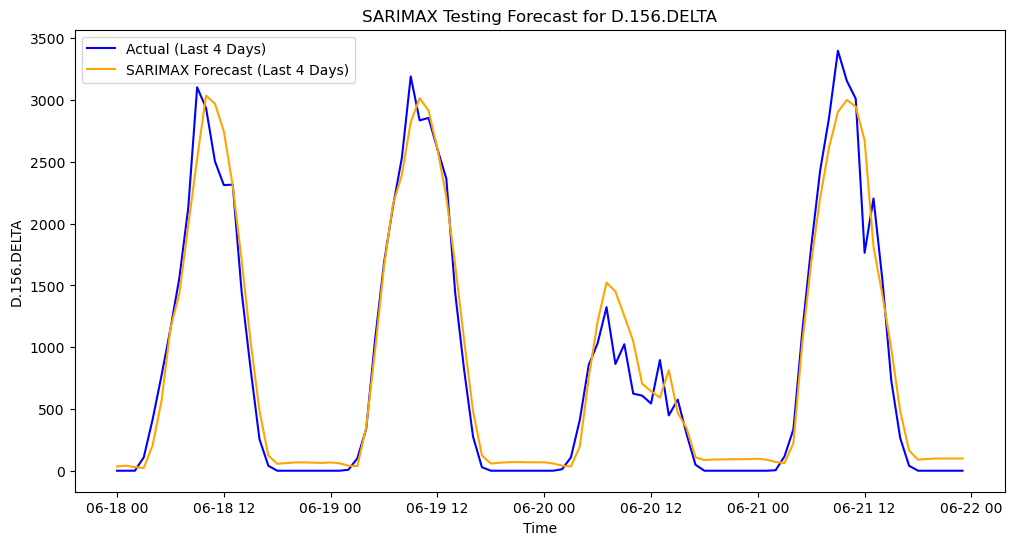


Total Energy Forecasted vs Actual for Each Day (Testing Period):
Actual Daily Sum:
2025-06-18    21876.0
2025-06-19    24272.0
2025-06-20     9672.0
2025-06-21    24792.0
Freq: D, Name: D.156.DELTA, dtype: float64
Forecasted Daily Sum:
2025-06-18    22802.991274
2025-06-19    25039.750895
2025-06-20    11858.557309
2025-06-21    25064.566496
Freq: D, Name: predicted_mean, dtype: float64


In [278]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure the index is in datetime format
df_combined.index = pd.to_datetime(df_combined.index)

# Define the target variable and exogenous variables
target_variable = "D.156.DELTA"
exogenous_variables = ["172", "D.171.ISIRR"]

# Prepare the data
y = df_combined[target_variable]  # Target variable
X = df_combined[exogenous_variables]  # Exogenous variables

# Handle missing values (fill or drop)
y = y.fillna(method="ffill")  # Forward fill missing values
X = X.fillna(method="ffill")  # Forward fill missing values

# Split the data into training and testing sets
test_start = y.index[-96]  # Start of testing (last 4 days)
test_end = y.index[-1]  # End of testing (last 4 days)
train_end = test_start  # Training ends before testing starts

# Training data
y_train = y[:train_end]  # Training data
X_train = X[:train_end]  # Exogenous variables for training

# Testing data (last 4 days)
y_test = y[test_start:test_end]
X_test = X[test_start:test_end]

# Fit the SARIMAX model on the training data
sarimax_model = SARIMAX(
    y_train,
    exog=X_train,  # Include exogenous variables
    order=(1, 1, 1),  # ARIMA order (p, d, q)
    seasonal_order=(1, 1, 1, 24),  # Seasonal order (P, D, Q, s) for daily seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_result = sarimax_model.fit()

# Forecast the testing period (last 4 days)
forecast_test = sarimax_result.get_forecast(steps=len(X_test), exog=X_test).predicted_mean
forecast_test.index = y_test.index  # Align forecast index with actual data

# Compute evaluation metrics for the testing period
mae = mean_absolute_error(y_test, forecast_test)
mse = mean_squared_error(y_test, forecast_test)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
non_zero_mask = y_test != 0  # Filter out zero values to avoid division by zero
y_test_non_zero = y_test[non_zero_mask]
forecast_test_non_zero = forecast_test[non_zero_mask]

mape = np.mean(np.abs((y_test_non_zero - forecast_test_non_zero) / y_test_non_zero)) * 100

# Calculate accuracy percentage
accuracy = 100 - mape

# Compute daily sums for actual and forecasted values (testing period)
y_test_daily_sum = y_test.resample('D').sum()
forecast_test_daily_sum = forecast_test.resample('D').sum()

# Calculate daily accuracy based on the full day
daily_mape = np.mean(np.abs((y_test_daily_sum - forecast_test_daily_sum) / y_test_daily_sum)) * 100
daily_accuracy = 100 - daily_mape

# Display metrics
print("Evaluation Metrics for Testing Period:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy Percentage: {accuracy:.2f}%")
print("\nDaily Accuracy Based on Full Day:")
print(f"Mean Absolute Percentage Error (MAPE): {daily_mape:.2f}%")
print(f"Accuracy Percentage: {daily_accuracy:.2f}%")

# Plot the testing forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual (Last 4 Days)", color="blue")
plt.plot(forecast_test, label="SARIMAX Forecast (Last 4 Days)", color="orange")
plt.title("SARIMAX Testing Forecast for D.156.DELTA")
plt.xlabel("Time")
plt.ylabel("D.156.DELTA")
plt.legend()
plt.show()

# Display daily sums
print("\nTotal Energy Forecasted vs Actual for Each Day (Testing Period):")
print("Actual Daily Sum:")
print(y_test_daily_sum)
print("Forecasted Daily Sum:")
print(forecast_test_daily_sum)

/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_12411/1202759160.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method="ffill")  # Forward fill missing values
/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_12411/1202759160.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill")  # Forward fill missing values
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89869D+00    |proj g|=  9.25014D-02


 This problem is unconstrained.



At iterate    5    f=  6.84384D+00    |proj g|=  2.14944D-02

At iterate   10    f=  6.83533D+00    |proj g|=  3.43297D-02

At iterate   15    f=  6.83492D+00    |proj g|=  1.62988D-03

At iterate   20    f=  6.83358D+00    |proj g|=  3.44761D-02

At iterate   25    f=  6.80030D+00    |proj g|=  9.87432D-02

At iterate   30    f=  6.76218D+00    |proj g|=  3.00120D-01

At iterate   35    f=  6.75164D+00    |proj g|=  5.52809D-03

At iterate   40    f=  6.75163D+00    |proj g|=  8.59584D-04

At iterate   45    f=  6.75146D+00    |proj g|=  8.94609D-03


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.75073D+00    |proj g|=  7.21652D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   7.217D-03   6.751D+00
  F =   6.7507275528617301     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Evaluation Metrics for Testing Period:
Mean Absolute Error (MAE): 122.27
Mean Squared Error (MSE): 41320.55
Root Mean Squared Error (RMSE): 203.27

Daily Accuracy Based on Full Day:
Accuracy Percentage: 94.92%


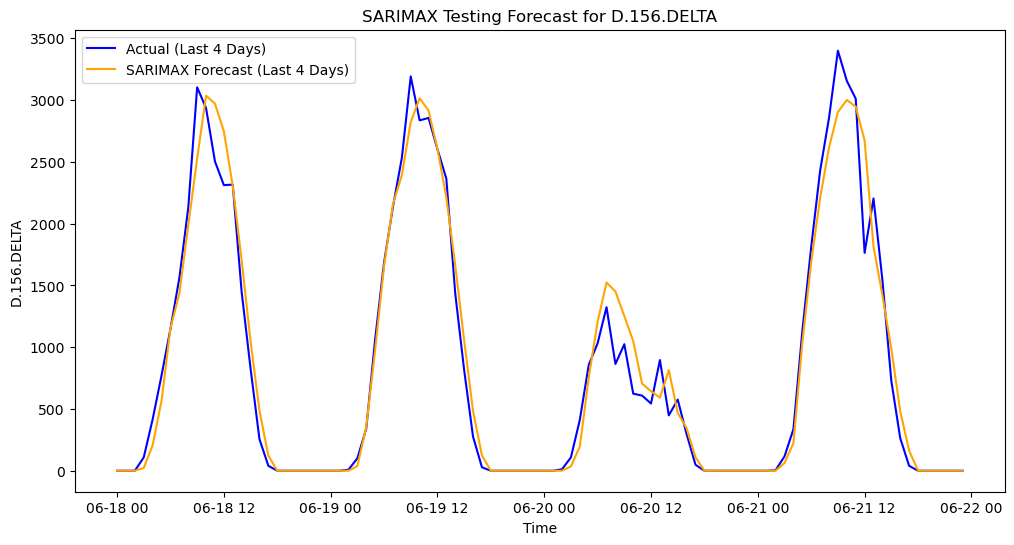


Total Energy Forecasted vs Actual for Each Day (Testing Period):
Actual Daily Sum:
2025-06-18    21876.0
2025-06-19    24272.0
2025-06-20     9672.0
2025-06-21    24792.0
Freq: D, Name: D.156.DELTA, dtype: float64
Forecasted Daily Sum:
2025-06-18    22317.336326
2025-06-19    24473.470642
2025-06-20    11141.815366
2025-06-21    24228.409670
Freq: D, Name: predicted_mean, dtype: float64


In [280]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure the index is in datetime format
df_combined.index = pd.to_datetime(df_combined.index)

# Define the target variable and exogenous variables
target_variable = "D.156.DELTA"
exogenous_variables = ["172", "D.171.ISIRR"]

# Prepare the data
y = df_combined[target_variable]  # Target variable
X = df_combined[exogenous_variables]  # Exogenous variables

# Handle missing values (fill or drop)
y = y.fillna(method="ffill")  # Forward fill missing values
X = X.fillna(method="ffill")  # Forward fill missing values

# Split the data into training and testing sets
test_start = y.index[-96]  # Start of testing (last 4 days)
test_end = y.index[-1]  # End of testing (last 4 days)
train_end = test_start  # Training ends before testing starts

# Training data
y_train = y[:train_end]  # Training data
X_train = X[:train_end]  # Exogenous variables for training

# Testing data (last 4 days)
y_test = y[test_start:test_end]
X_test = X[test_start:test_end]

# Fit the SARIMAX model on the training data
sarimax_model = SARIMAX(
    y_train,
    exog=X_train,  # Include exogenous variables
    order=(1, 1, 1),  # ARIMA order (p, d, q)
    seasonal_order=(1, 1, 1, 24),  # Seasonal order (P, D, Q, s) for daily seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_result = sarimax_model.fit()

# Forecast the testing period (last 4 days)
forecast_test = sarimax_result.get_forecast(steps=len(X_test), exog=X_test).predicted_mean
forecast_test.index = y_test.index  # Align forecast index with actual data

# Ground predictions to 0 where irradiance is <4 during the testing period
forecast_test.loc[X_test["D.171.ISIRR"] < 3] = 0

# Compute evaluation metrics for the testing period
mae = mean_absolute_error(y_test, forecast_test)
mse = mean_squared_error(y_test, forecast_test)
rmse = np.sqrt(mse)

# Compute daily sums for actual and forecasted values (testing period)
y_test_daily_sum = y_test.resample('D').sum()
forecast_test_daily_sum = forecast_test.resample('D').sum()

# Calculate daily accuracy based on the full day
daily_difference = np.abs(y_test_daily_sum - forecast_test_daily_sum)
daily_accuracy = 100 - (daily_difference / y_test_daily_sum * 100).mean()

# Display metrics
print("Evaluation Metrics for Testing Period:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("\nDaily Accuracy Based on Full Day:")
print(f"Accuracy Percentage: {daily_accuracy:.2f}%")

# Plot the testing forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual (Last 4 Days)", color="blue")
plt.plot(forecast_test, label="SARIMAX Forecast (Last 4 Days)", color="orange")
plt.title("SARIMAX Testing Forecast for D.156.DELTA")
plt.xlabel("Time")
plt.ylabel("D.156.DELTA")
plt.legend()
plt.show()

# Display daily sums
print("\nTotal Energy Forecasted vs Actual for Each Day (Testing Period):")
print("Actual Daily Sum:")
print(y_test_daily_sum)
print("Forecasted Daily Sum:")
print(forecast_test_daily_sum)

In [310]:
df.loc["2025-06-18"]

,172,D.156.DELTA,D.171.ISIRR
2025-06-18 00:00:00,21.695,0.0,2.514
2025-06-18 01:00:00,21.020,0.0,2.506
2025-06-18 02:00:00,21.014,0.0,6.289
2025-06-18 03:00:00,21.584,108.0,47.823
2025-06-18 04:00:00,23.513,416.0,141.180
2025-06-18 05:00:00,25.066,772.0,234.365
2025-06-18 06:00:00,27.351,1148.0,371.414
2025-06-18 07:00:00,28.637,1560.0,500.254
2025-06-18 08:00:00,29.983,2128.0,699.258
2025-06-18 09:00:00,30.882,3104.0,930.263


In [328]:
# Ensure the index is in datetime format
solar_data_combined.index = pd.to_datetime(solar_data_combined.index)
solar_data_combined.loc["2025-06-18"]

,172,D.171.ISIRR,172_scaled,D.171.ISIRR_scaled
2025-06-18 00:00:00,19.76,0.00,22.827279,0.000000
2025-06-18 01:00:00,19.03,0.00,21.983963,0.000000
2025-06-18 02:00:00,18.13,0.00,20.944259,0.000000
2025-06-18 03:00:00,17.83,5.91,20.597691,5.728286
2025-06-18 04:00:00,18.57,45.05,21.452559,43.664855
2025-06-18 05:00:00,20.07,158.44,23.185399,153.568472
2025-06-18 06:00:00,21.67,353.37,25.033762,342.504992
2025-06-18 07:00:00,22.87,470.28,26.420034,455.820380
2025-06-18 08:00:00,23.90,667.53,27.609917,647.005568
2025-06-18 09:00:00,24.90,862.18,28.765144,835.670697


In [327]:
# Filter the last 4 days
last_4_days = df.index[-96:]  # Adjust based on your dataset's frequency
scaling_factor_172 = df.loc[last_4_days, "172"].mean() / solar_data_combined.loc[last_4_days, "172"].mean()
scaling_factor_D171_ISIRR = df.loc[last_4_days, "D.171.ISIRR"].mean() / solar_data_combined.loc[last_4_days, "D.171.ISIRR"].mean()

print(f"Scaling factor for '172' (last 4 days): {scaling_factor_172:.4f}")
print(f"Scaling factor for 'D.171.ISIRR' (last 4 days): {scaling_factor_D171_ISIRR:.4f}")

Scaling factor for '172' (last 4 days): 1.1552
Scaling factor for 'D.171.ISIRR' (last 4 days): 0.9693


In [333]:
solar_data_combined.loc["2025-06-21"]

,172,D.171.ISIRR,172_scaled,D.171.ISIRR_scaled
2025-06-21 00:00:00,13.93,0.00,16.092307,0.000000
2025-06-21 01:00:00,13.07,0.00,15.098812,0.000000
2025-06-21 02:00:00,11.93,0.00,13.781854,0.000000
2025-06-21 03:00:00,10.90,4.92,12.591971,4.768726
2025-06-21 04:00:00,13.90,42.61,16.057650,41.299878
2025-06-21 05:00:00,16.87,304.69,19.488674,295.321748
2025-06-21 06:00:00,19.50,523.25,22.526920,507.161720
2025-06-21 07:00:00,21.47,719.24,24.802716,697.125649
2025-06-21 08:00:00,22.73,879.12,26.258302,852.089845
2025-06-21 09:00:00,23.67,983.71,27.344215,953.464034


In [332]:
df.loc["2025-06-21"]

,172,D.156.DELTA,D.171.ISIRR
2025-06-21 00:00:00,15.092,0.0,2.427
2025-06-21 01:00:00,14.362,0.0,2.440
2025-06-21 02:00:00,13.872,4.0,9.234
2025-06-21 03:00:00,16.308,116.0,53.972
2025-06-21 04:00:00,21.183,336.0,150.313
2025-06-21 05:00:00,25.894,1128.0,347.083
2025-06-21 06:00:00,24.827,1812.0,553.338
2025-06-21 07:00:00,25.539,2428.0,739.166
2025-06-21 08:00:00,26.819,2856.0,890.929
2025-06-21 09:00:00,27.519,3400.0,979.527


In [334]:
# Apply scaling factors to solar_data_combined
solar_data_combined["172"] = solar_data_combined["172"] * scaling_factor_172
solar_data_combined["D.171.ISIRR"] = solar_data_combined["D.171.ISIRR"] * scaling_factor_D171_ISIRR

# Merge scaled values into df (overwrite matching indexes and columns)
df_updated = df.copy()  # Create a copy of df to preserve the original
df_updated.update(solar_data_combined)  # Overwrite values in df with scaled values from solar_data_combined

# Display the updated DataFrame
print("Updated df with scaled values from solar_data_combined:")
print(df_updated.head())

Updated df with scaled values from solar_data_combined:
                       172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00  3.226        440.0      675.620
2022-03-18 08:00:00  4.607       3344.0      836.143
2022-03-18 09:00:00  5.690       3572.0      939.744
2022-03-18 10:00:00  6.827       3452.0      972.460
2022-03-18 11:00:00  7.632       3040.0      792.876


In [335]:
df_updated.loc["2025-06-21"]

,172,D.156.DELTA,D.171.ISIRR
2025-06-21 00:00:00,16.092307,0.0,0.000000
2025-06-21 01:00:00,15.098812,0.0,0.000000
2025-06-21 02:00:00,13.781854,4.0,0.000000
2025-06-21 03:00:00,12.591971,116.0,4.768726
2025-06-21 04:00:00,16.057650,336.0,41.299878
2025-06-21 05:00:00,19.488674,1128.0,295.321748
2025-06-21 06:00:00,22.526920,1812.0,507.161720
2025-06-21 07:00:00,24.802716,2428.0,697.125649
2025-06-21 08:00:00,26.258302,2856.0,852.089845
2025-06-21 09:00:00,27.344215,3400.0,953.464034


/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_12411/608013568.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method="ffill")  # Forward fill missing values
/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_12411/608013568.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill")  # Forward fill missing values
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89813D+00    |proj g|=  9.25238D-02


 This problem is unconstrained.



At iterate    5    f=  6.84358D+00    |proj g|=  3.68170D-02

At iterate   10    f=  6.83587D+00    |proj g|=  5.46520D-02

At iterate   15    f=  6.83447D+00    |proj g|=  1.63015D-03

At iterate   20    f=  6.83438D+00    |proj g|=  1.72312D-02

At iterate   25    f=  6.83348D+00    |proj g|=  4.25565D-02

At iterate   30    f=  6.79930D+00    |proj g|=  2.17336D-01

At iterate   35    f=  6.76853D+00    |proj g|=  1.09212D-01

At iterate   40    f=  6.75186D+00    |proj g|=  1.37077D-02

At iterate   45    f=  6.75163D+00    |proj g|=  4.18657D-04


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.75162D+00    |proj g|=  1.14939D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     77      1     0     0   1.149D-02   6.752D+00
  F =   6.7516198044208089     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Evaluation Metrics for Testing Period:
Mean Absolute Error (MAE): 141.99
Mean Squared Error (MSE): 55469.85
Root Mean Squared Error (RMSE): 235.52

Daily Accuracy Based on Full Day:
Accuracy Percentage: 89.65%


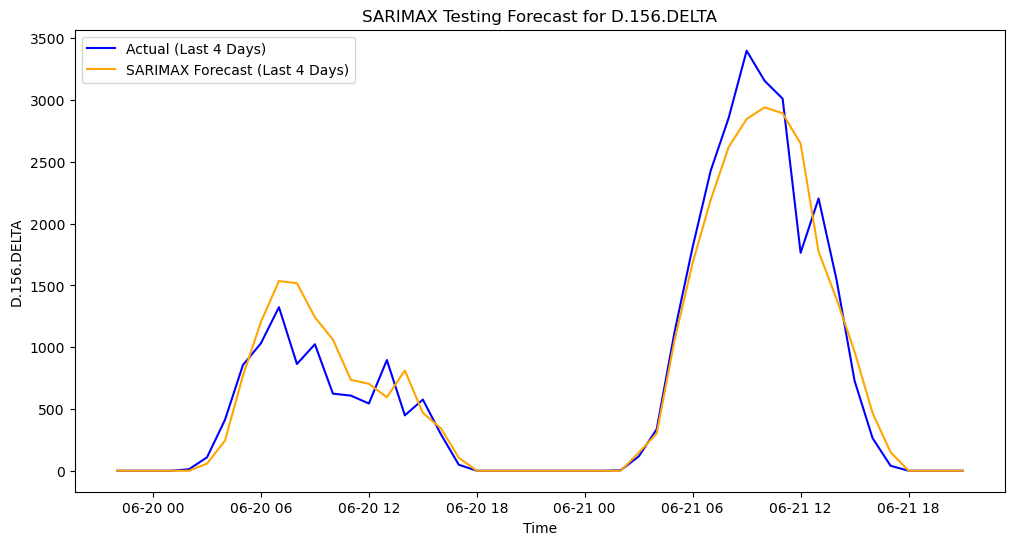


Total Energy Forecasted vs Actual for Each Day (Testing Period):
Actual Daily Sum:
2025-06-19        0.0
2025-06-20     9672.0
2025-06-21    24792.0
Freq: D, Name: D.156.DELTA, dtype: float64
Forecasted Daily Sum:
2025-06-19        0.000000
2025-06-20    11395.694302
2025-06-21    24078.706942
Freq: D, Name: predicted_mean, dtype: float64

Total Energy Forecasted for Each Day (Next Two Days):
2025-06-21      189.620457
2025-06-22    26055.060702
2025-06-23    21647.117034
Freq: D, Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


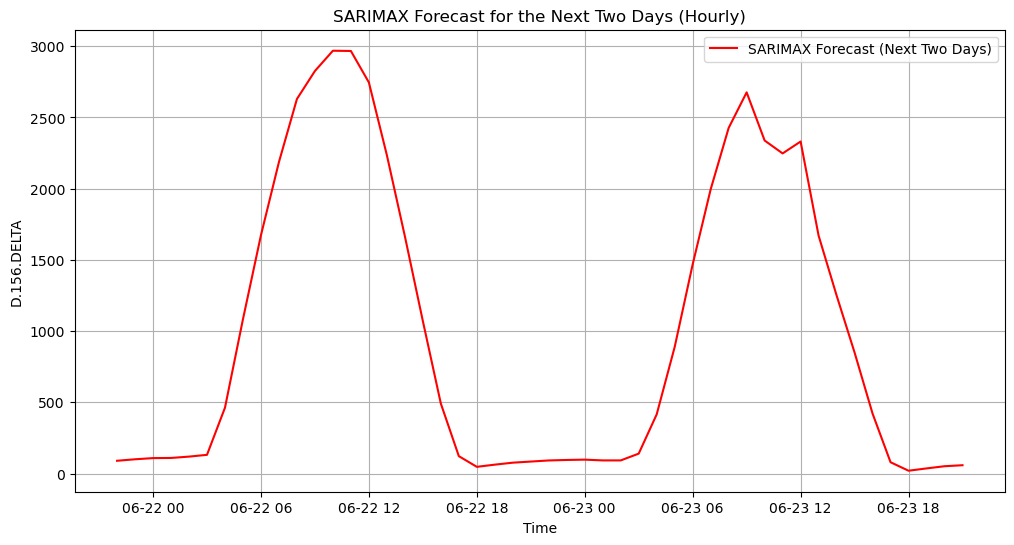

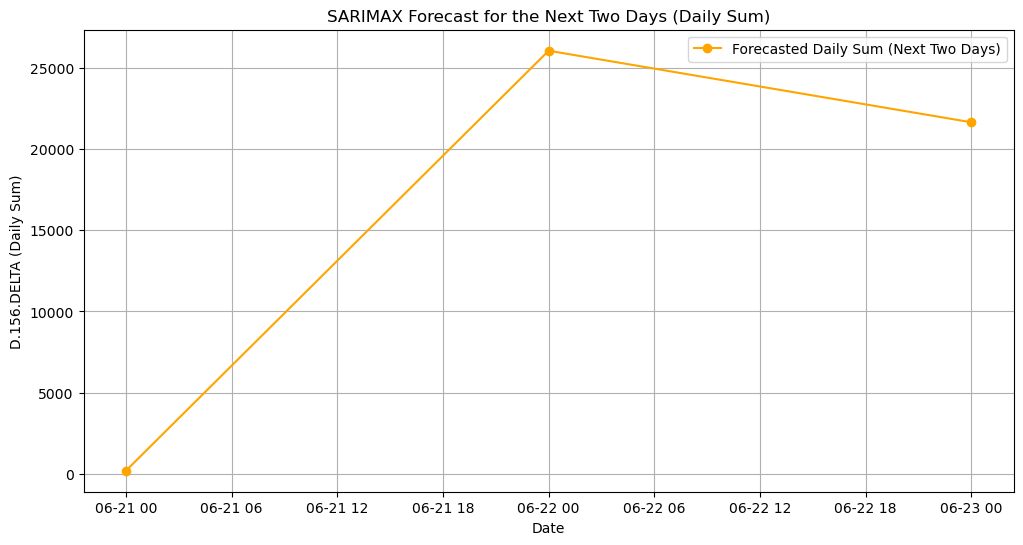

In [368]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure the index is in datetime format
df_updated.index = pd.to_datetime(df_updated.index)

# Define the target variable and exogenous variables
target_variable = "D.156.DELTA"
exogenous_variables = ["172", "D.171.ISIRR"]

# Prepare the data
y = df_updated[target_variable]  # Target variable
X = df_updated[exogenous_variables]  # Exogenous variables

# Handle missing values (fill or drop)
y = y.fillna(method="ffill")  # Forward fill missing values
X = X.fillna(method="ffill")  # Forward fill missing values

# Split the data into training, testing, and forecasting sets
test_start = y.index[-96]  # Start of testing (last 4 days)
forecast_start = y.index[-48]  # Start of forecasting (last 2 days)
test_end = forecast_start - pd.Timedelta(hours=1)  # End of testing (4 days before forecast starts)
train_end = test_start  # Training ends before testing starts

# Training data
y_train = y[:train_end]  # Training data
X_train = X[:train_end]  # Exogenous variables for training

# Testing data (last 4 days before forecast starts)
y_test = y[test_start:test_end]
X_test = X[test_start:test_end]

# Forecasting data (next 2 days)
X_forecast = X[forecast_start:]  # Exogenous variables for forecasting

# Fit the SARIMAX model on the training data
sarimax_model = SARIMAX(
    y_train,
    exog=X_train,  # Include exogenous variables
    order=(1, 1, 1),  # ARIMA order (p, d, q)
    seasonal_order=(1, 1, 1, 24),  # Seasonal order (P, D, Q, s) for daily seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_result = sarimax_model.fit()

# Forecast the testing period (last 4 days)
forecast_test = sarimax_result.get_forecast(steps=len(X_test), exog=X_test).predicted_mean
forecast_test.index = y_test.index  # Align forecast index with actual data

# Ground predictions to 0 where irradiance is <3 during the testing period
forecast_test.loc[X_test["D.171.ISIRR"] < 3] = 0

# Compute evaluation metrics for the testing period
mae = mean_absolute_error(y_test, forecast_test)
mse = mean_squared_error(y_test, forecast_test)
rmse = np.sqrt(mse)

# Compute daily sums for actual and forecasted values (testing period)
y_test_daily_sum = y_test.resample('D').sum()
forecast_test_daily_sum = forecast_test.resample('D').sum()

# Calculate daily accuracy based on the full day
daily_difference = np.abs(y_test_daily_sum - forecast_test_daily_sum)
daily_accuracy = 100 - (daily_difference / y_test_daily_sum * 100).mean()

# Display metrics
print("Evaluation Metrics for Testing Period:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("\nDaily Accuracy Based on Full Day:")
print(f"Accuracy Percentage: {daily_accuracy:.2f}%")

# Plot the testing forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual (Last 4 Days)", color="blue")
plt.plot(forecast_test, label="SARIMAX Forecast (Last 4 Days)", color="orange")
plt.title("SARIMAX Testing Forecast for D.156.DELTA")
plt.xlabel("Time")
plt.ylabel("D.156.DELTA")
plt.legend()
plt.show()

# Display daily sums for testing
print("\nTotal Energy Forecasted vs Actual for Each Day (Testing Period):")
print("Actual Daily Sum:")
print(y_test_daily_sum)
print("Forecasted Daily Sum:")
print(forecast_test_daily_sum)

# Forecast the next 2 days
forecast_future = sarimax_result.get_forecast(steps=len(X_forecast), exog=X_forecast).predicted_mean
forecast_future.index = X_forecast.index  # Align forecast index with future timestamps

# Compute daily sums for the forecasted values (next 2 days)
forecast_future_daily_sum = forecast_future.resample('D').sum()

# Display daily sums for forecasting
print("\nTotal Energy Forecasted for Each Day (Next Two Days):")
print(forecast_future_daily_sum)

# Plot the forecast for the next two days (hourly)
plt.figure(figsize=(12, 6))
plt.plot(forecast_future, label="SARIMAX Forecast (Next Two Days)", color="red")
plt.title("SARIMAX Forecast for the Next Two Days (Hourly)")
plt.xlabel("Time")
plt.ylabel("D.156.DELTA")
plt.legend()
plt.grid()
plt.show()

# Plot the forecast for the next two days (daily sums)
plt.figure(figsize=(12, 6))
plt.plot(forecast_future_daily_sum, label="Forecasted Daily Sum (Next Two Days)", color="orange", marker="o")
plt.title("SARIMAX Forecast for the Next Two Days (Daily Sum)")
plt.xlabel("Date")
plt.ylabel("D.156.DELTA (Daily Sum)")
plt.legend()
plt.grid()
plt.show()